# Pump it Up: Data Mining the Water Table

On [drivendata.org](https://www.drivendata.org/), you will find a wealth of opportunities to do data science for social good.  It is a site that crowdsources the world's biggest social challenges through online competitions.  I decided to give the [*Pump it Up: Data Mining the Water Table*](https://www.drivendata.org/competitions/7/page/23/) challenge a try.  In this article, I will walk you through how approached the problem.    

## The problem

To improve maintenance operations and ensure that clean, potable water is available to communities in Tanzania.  

## Approach

I used machine learning algorithms to predict the operating condition of water pumps in Tanzania.  Then submitted these predictions to [drivendata](https://www.drivendata.org/).

## The Data

The data is supplied by [Taarifa](http://taarifa.org/) and the [Tanzanian Ministry of Water](http://maji.go.tz/),   

You can download the data on the challenge's [data](https://www.drivendata.org/competitions/7/data/) link.  There are 4 files available:

* Training set values - The independent variables for the training set
* Training set labels - The dependent variables for each row in the training set values
* Test set values - The independent variables that need predictions
* Submission format - The format for submitting predictions

I previewed each file to see what they contain.

In [55]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 200

# Raw data directory
data_raw = "../data/raw/"

# read sample submissions file
sample_submissions = pd.read_csv(data_raw + "SubmissionFormat.csv")
print(sample_submissions.head())

      id     status_group
0  50785  predicted label
1  51630  predicted label
2  17168  predicted label
3  45559  predicted label
4  49871  predicted label


### Sample of training set values

In [56]:
# read training set
train_values = pd.read_csv(data_raw + "train.csv")
print("Training set contains {} rows and {} columns \n".format(train_values.shape[0], train_values.shape[1]))
train_values.head()

Training set contains 59400 rows and 40 columns 



,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


### Sample of the training set labels

In [57]:
# read labels
target = pd.read_csv(data_raw + "train_labels.csv")
print("Target set contains {} rows and {} columns \n".format(target.shape[0], target.shape[1]))
target.head()

Target set contains 59400 rows and 2 columns 



,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


### Sample of test set

In [58]:
# read test set
test = pd.read_csv(data_raw + "test.csv")
print("Test set contains {} rows and {} columns \n".format(test.shape[0], test.shape[1]))
test.head()

Test set contains 14850 rows and 40 columns 



,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


The train and test files were merged to make it easier to analyze all the data.  The training labels were also added to the train dataframe.

In [59]:
train = train_values.copy()

# add target to training set
train['status_group'] = target['status_group']

In [60]:
# merge independent variables from train and test sets
frames = [train, test]
data = pd.concat(frames)
print("Merged data set contains {} rows and {} columns".format(data.shape[0], data.shape[1]))

Merged data set contains 74250 rows and 41 columns


In [94]:
def plot_horizontal_bar(df, column, title, figsize, colors, normalize, yticks_rotation, save_path = None):
    values = df[column].value_counts(normalize = normalize)[:30]
    names = values.index
    fig, ax = plt.subplots(figsize = figsize)
    ax.invert_yaxis()
    colors = colors
    plt.barh(bottom = np.arange(len(values)), width = values, color = colors)
    plt.yticks(range(len(names)), names, rotation = yticks_rotation)
    plt.title(title)

    if save_path:
        plt.savefig(save_path)
    plt.show()

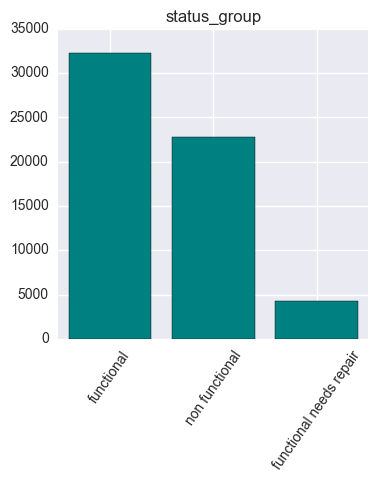

In [95]:
def plot_bar(df, column, title, figsize, colors, normalize, xticks_rotation, save_path = None):
    values = df[column].value_counts(normalize = normalize)[:30]
    names = values.index
    fig, ax = plt.subplots(figsize = figsize)
    
    colors = colors
    plt.bar(np.arange(len(values)), values, color = colors, align = 'center')
    plt.xticks(range(len(names)), names, rotation = xticks_rotation)
    plt.title(title)

    if save_path:
        plt.savefig(save_path)
    plt.show()
    
plot_bar(df = train, 
         column = 'status_group', 
         title = 'status_group', 
         colors = ['teal'], 
         figsize = (4,4), 
         normalize = False,
         xticks_rotation = 55,
         save_path = '../reports/figures/status_group')

A graph showing the distribution of the label column

### List of features

- amount_tsh - Total static head (amount water available to waterpoint)
- date_recorded - The date the row was entered
- funder - Who funded the well
- gps_height - Altitude of the well
- installer - Organization that installed the well
- longitude - GPS coordinate
- latitude - GPS coordinate
- wpt_name - Name of the waterpoint if there is one
- num_private -
- basin - Geographic water basin
- subvillage - Geographic location
- region - Geographic location
- region_code - Geographic location (coded)
- district_code - Geographic location (coded)
- lga - Geographic location
- ward - Geographic location
- population - Population around the well
- public_meeting - True/False
- recorded_by - Group entering this row of data
- scheme_management - Who operates the waterpoint
- scheme_name - Who operates the waterpoint
- permit - If the waterpoint is permitted
- construction_year - Year the waterpoint was constructed
- extraction_type - The kind of extraction the waterpoint uses
- extraction_type_group - The kind of extraction the waterpoint uses
- extraction_type_class - The kind of extraction the waterpoint uses
- management - How the waterpoint is managed
- management_group - How the waterpoint is managed
- payment - What the water costs
- payment_type - What the water costs
- water_quality - The quality of the water
- quality_group - The quality of the water
- quantity - The quantity of water
- quantity_group - The quantity of water
- source - The source of the water
- source_type - The source of the water
- source_class - The source of the water
- waterpoint_type - The kind of waterpoint
- waterpoint_type_group - The kind of waterpoint

In [78]:
import folium

# Tanzanian coordinates
coordinates = [-6.307, 34.854]

# plot map
map_1 = folium.Map(location=coordinates, zoom_start=6, tiles='Stamen Terrain')

# add sample points
for point in data[:1000].iterrows():
    lat = point[1]['latitude']
    lon = point[1]['longitude']
    folium.CircleMarker([lat, lon],
                    radius=2000,
                    popup=point[1]['status_group'],
                    color='#3366FF',
                    fill_color='#3366FF',
                   ).add_to(map_1)

map_1.create_map(path='../reports/figures/wells.html')
map_1

C:\Users\donal\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: Map.create_map is deprecated. Use Map.save instead


This is a map showing the location of some wells across Tanzania.  I noticed that some wells were located outside of Tanzania.  But this seems like an error in the data.  So I isolated all the cases with a longitudinal coordinate of zero.  

In [112]:
print('There are {} wells with a longitudinal coordinate set to zero'.format(data['longitude'].value_counts()[0]))

There are 2269 wells with a longitudinal coordinate set to zero


After scanning this list, I noticed that a few features have the same descriptions.  So I explored the following sets of columns that were similar.

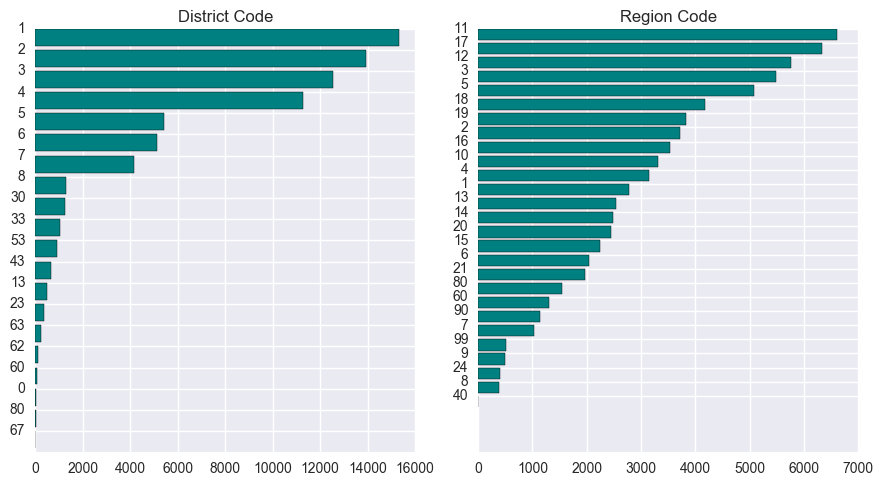

In [28]:
def compare_two_columns(data, ax1_col, ax1_title, ax2_col, ax2_title, num_cols, figsize, normalize, color, savefile):
    """Compare the value counts of two Pandas DataFrame columns"""
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(figsize)

    ax1_values = data[ax1_col].value_counts(normalize = normalize)[:num_cols]
    ax1_names = ax1_values.index
    ax1.barh(bottom = np.arange(len(ax1_values)), tick_label = ax1_names, width = ax1_values, color = color)
    ax1.set_title(ax1_title)
    ax1.invert_yaxis()

    ax2_values = data[ax2_col].value_counts(normalize = normalize)[:num_cols]
    ax2_names = ax2_values.index
    ax2.set_title(ax2_title)
    ax2.barh(bottom = np.arange(len(ax2_values)), tick_label = ax2_names, width = ax2_values, color = color)
    ax2.invert_yaxis()

    plt.tight_layout()
    plt.savefig(savefile)
    plt.show()
    
compare_two_columns(data = data,
                    ax1_col = 'district_code', 
                    ax1_title = 'District Code',
                    ax2_col = 'region_code',
                    ax2_title = 'Region Code',
                    num_cols = 30,
                    figsize = (9, 5),
                    normalize = False,
                    color = ['teal'],
                    savefile = '../reports/figures/district_region_comparison')

There doesn't seem to be any relation between these columns, despite the similar descriptions, so I kept both `district_code` and `region_code` columns.

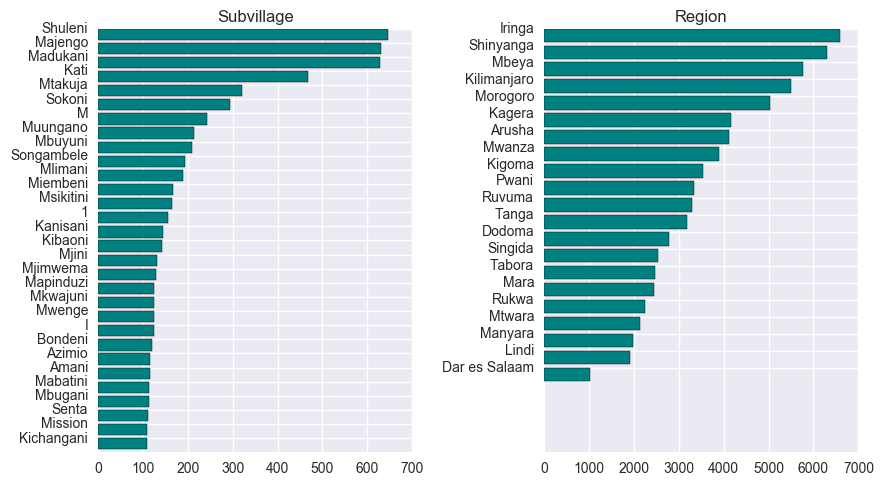

In [29]:
compare_two_columns(data = data,
                    ax1_col = 'subvillage', 
                    ax1_title = 'Subvillage',
                    ax2_col = 'region',
                    ax2_title = 'Region',
                    num_cols = 30,
                    figsize = (9, 5),
                    normalize = False,
                    color = ['teal'],
                    savefile = '../reports/figures/subvillage_region_comparison')

In [361]:
print(data['subvillage'].describe())
print('\n')
print(data['region'].describe())

count       73780
unique      21425
top       Shuleni
freq          646
Name: subvillage, dtype: object


count      74250
unique        21
top       Iringa
freq        6599
Name: region, dtype: object


I dropped the `subvillage` column because it contained 21,425 unique values.

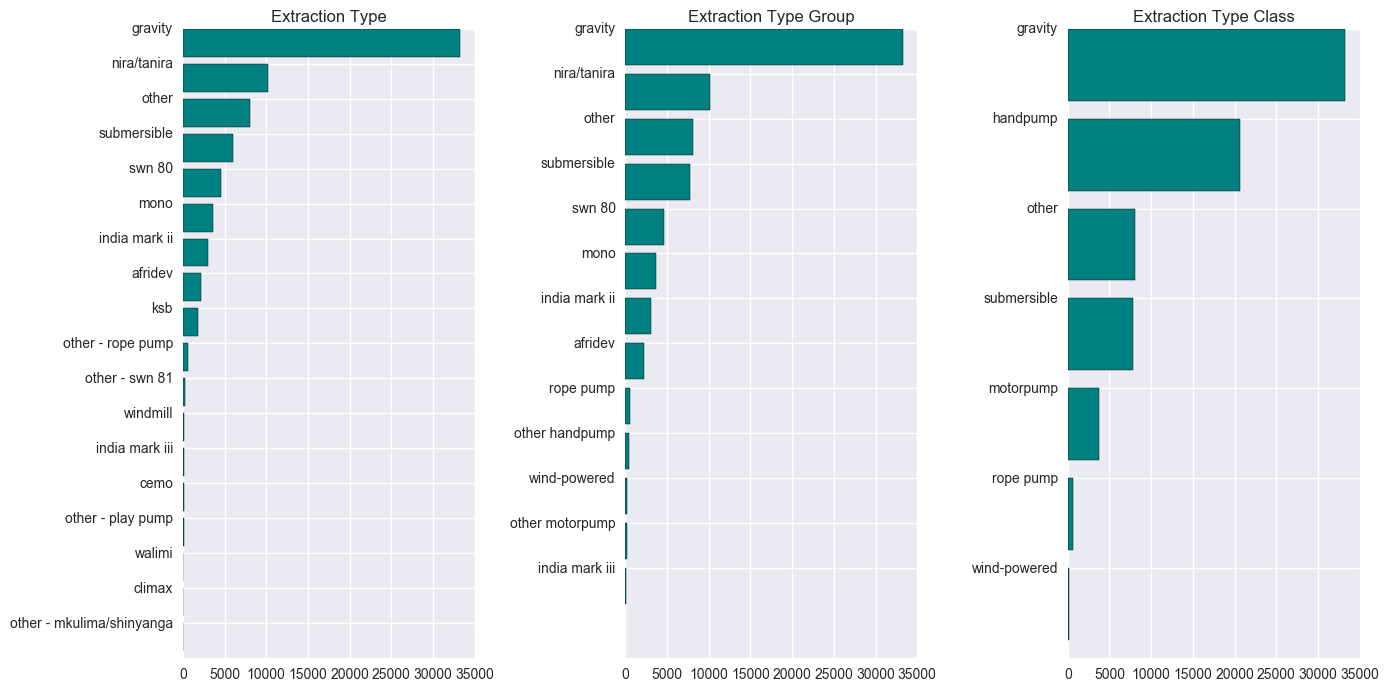

In [362]:
def compare_three_columns(data, ax1_col, ax1_title, ax2_col, ax2_title, ax3_col, ax3_title, num_cols, figsize, normalize, color, savefile):
    """Compare three Pandas DataFrame columns"""
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_size_inches(figsize)

    ax1_values = data[ax1_col].value_counts(normalize = normalize)[:num_cols]
    ax1_names = ax1_values.index
    ax1.barh(bottom = np.arange(len(ax1_values)), tick_label = ax1_names, width = ax1_values, color = color)
    ax1.set_title(ax1_title)
    ax1.invert_yaxis()

    ax2_values = data[ax2_col].value_counts(normalize = normalize)[:num_cols]
    ax2_names = ax2_values.index
    ax2.set_title(ax2_title)
    ax2.barh(bottom = np.arange(len(ax2_values)), tick_label = ax2_names, width = ax2_values, color = color)
    ax2.invert_yaxis()

    ax3_values = data[ax3_col].value_counts(normalize = normalize)[:num_cols]
    ax3_names = ax3_values.index
    ax3.set_title(ax3_title)
    ax3.barh(bottom = np.arange(len(ax3_values)), tick_label = ax3_names, width = ax3_values, color = color)
    ax3.invert_yaxis()

    plt.tight_layout()
    plt.savefig(savefile)
    plt.show()
    
compare_three_columns(data = data, 
                      ax1_col = 'extraction_type', 
                      ax1_title = 'Extraction Type',
                      ax2_col = 'extraction_type_group',
                      ax2_title = 'Extraction Type Group',
                      ax3_col = 'extraction_type_class',
                      ax3_title = 'Extraction Type Class', 
                      num_cols = 30,
                      figsize = (14, 7),
                      normalize = False,
                      color = ['teal'],
                      savefile = '../reports/figures/extraction_comparison')    

The columns show similar information, so I dropped the `extraction_type` column because it contained what looks like many different types of pumps.  The algorithms may not be able to learn from too few samples.  A quick look at the subplot of this column shows that it contains `climax`, `walimi` and `other-mkulima/shinyanga`.  But these unique values rarely occur.  

In [363]:
print(data['extraction_type'].value_counts())

gravity                      33263
nira/tanira                  10205
other                         8102
submersible                   5982
swn 80                        4588
mono                          3628
india mark ii                 3029
afridev                       2208
ksb                           1790
other - rope pump              572
other - swn 81                 284
windmill                       152
india mark iii                 135
cemo                           108
other - play pump              101
walimi                          60
climax                          41
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64


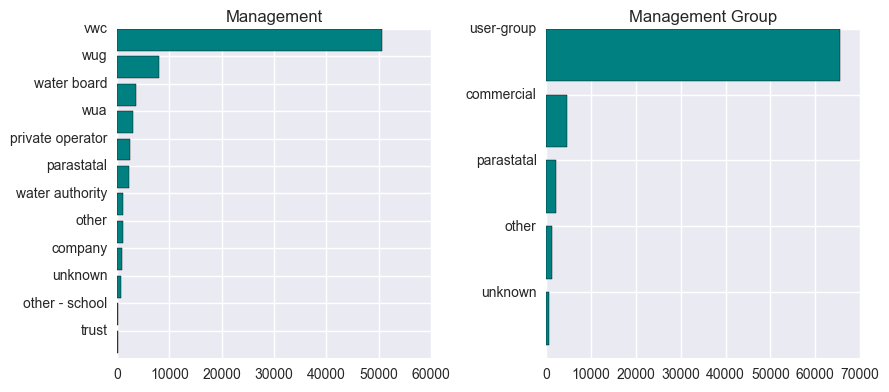

In [364]:
compare_two_columns(data = data,
                    ax1_col = 'management', 
                    ax1_title = 'Management',
                    ax2_col = 'management_group',
                    ax2_title = 'Management Group',
                    num_cols = 30,
                    figsize = (9, 4),
                    normalize = False,
                    color = ['teal'],
                    savefile = '../reports/figures/management_comparison')

I chose to keep both `management` and `management_group` columns.  

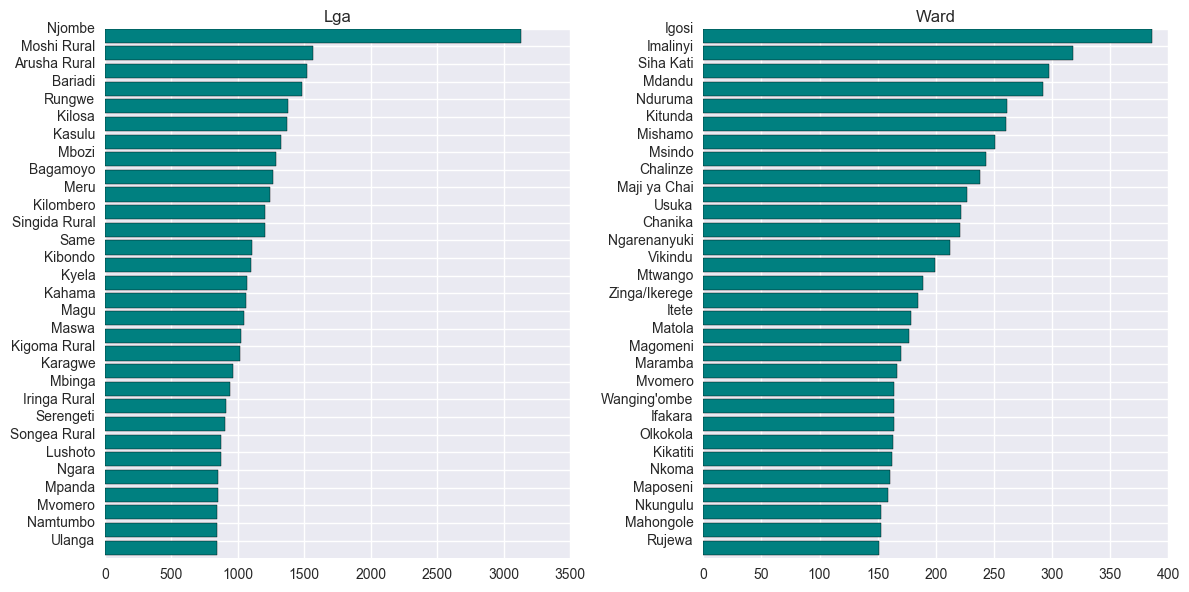

In [365]:
compare_two_columns(data = data,
                    ax1_col = 'lga', 
                    ax1_title = 'Lga',
                    ax2_col = 'ward',
                    ax2_title = 'Ward',
                    num_cols = 30,
                    figsize = (12, 6),
                    normalize = False,
                    color = ['teal'],
                    savefile = '../reports/figures/lga_ward_comparison')

In [366]:
print(data['lga'].describe())
print('\n')
print(data['ward'].describe())

count      74250
unique       125
top       Njombe
freq        3128
Name: lga, dtype: object


count     74250
unique     2098
top       Igosi
freq        386
Name: ward, dtype: object


I dropped the `ward` column because it contains 2098 unique values.

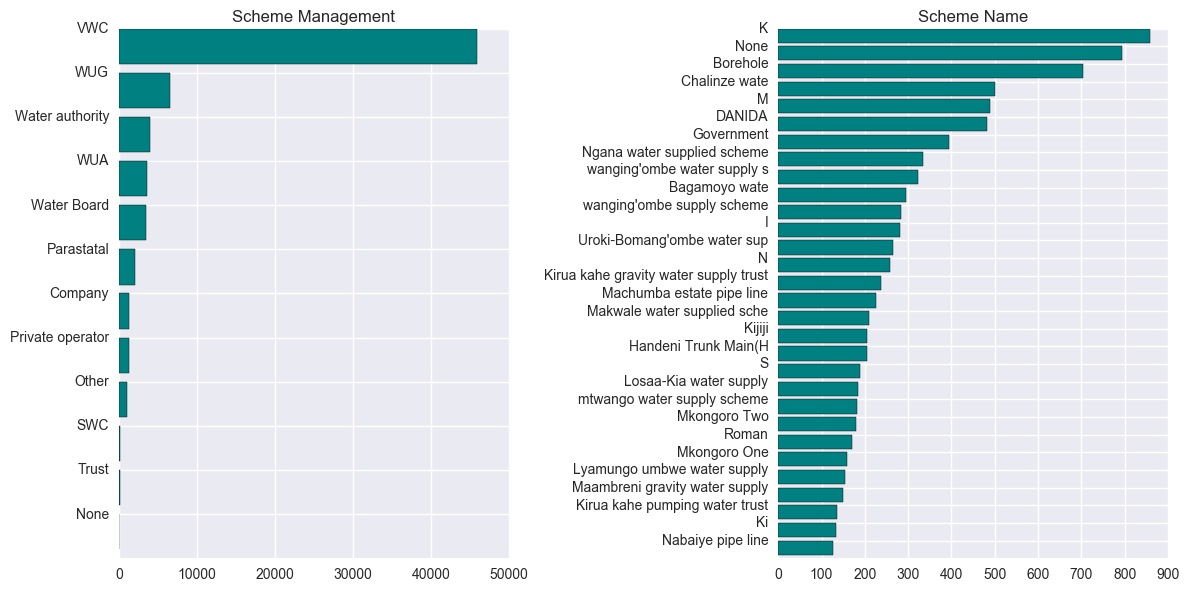

In [367]:
compare_two_columns(data = data,
                    ax1_col = 'scheme_management', 
                    ax1_title = 'Scheme Management',
                    ax2_col = 'scheme_name',
                    ax2_title = 'Scheme Name',
                    num_cols = 30,
                    figsize = (12, 6),
                    normalize = False,
                    color = ['teal'],
                    savefile = '../reports/figures/scheme_comparison')

In [368]:
print(data['scheme_management'].describe())
print('\n')
print(data['scheme_name'].describe())

count     69404
unique       12
top         VWC
freq      45917
Name: scheme_management, dtype: object


count     38992
unique     2868
top           K
freq        858
Name: scheme_name, dtype: object


I dropped the `scheme_name` column

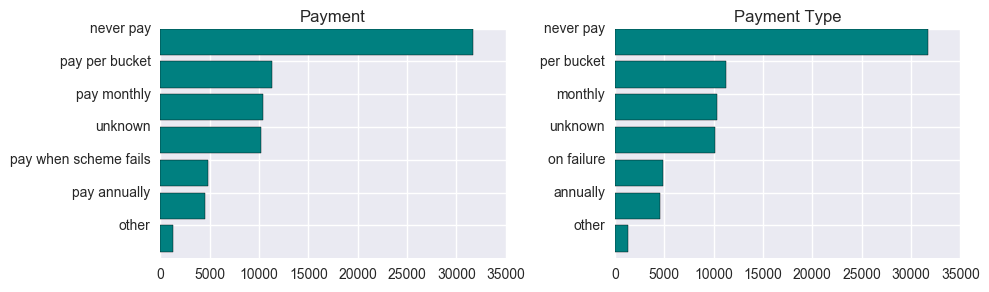

In [369]:
compare_two_columns(data = data,
                    ax1_col = 'payment', 
                    ax1_title = 'Payment',
                    ax2_col = 'payment_type',
                    ax2_title = 'Payment Type',
                    num_cols = 30,
                    figsize = (10, 3),
                    normalize = False,
                    color = ['teal'],
                    savefile = '../reports/figures/payment_comparison')

Both columns are the same so I dropped the `payment_type` column

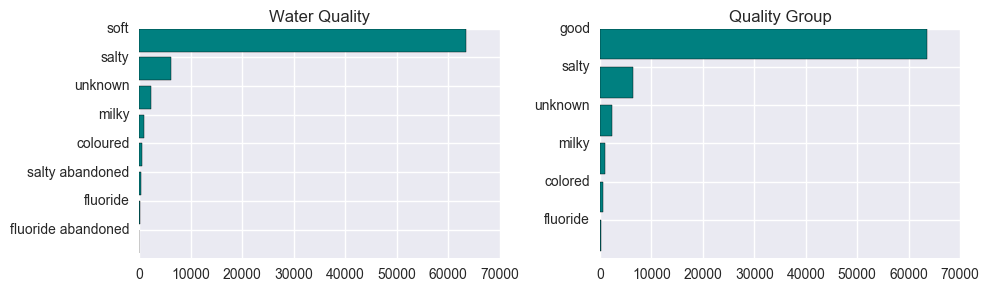

In [370]:
compare_two_columns(data = data,
                    ax1_col = 'water_quality', 
                    ax1_title = 'Water Quality',
                    ax2_col = 'quality_group',
                    ax2_title = 'Quality Group',
                    num_cols = 30,
                    figsize = (10, 3),
                    normalize = False,
                    color = ['teal'],
                    savefile = '../reports/figures/water_quality_comparison')

I dropped the `quality_group` column.  

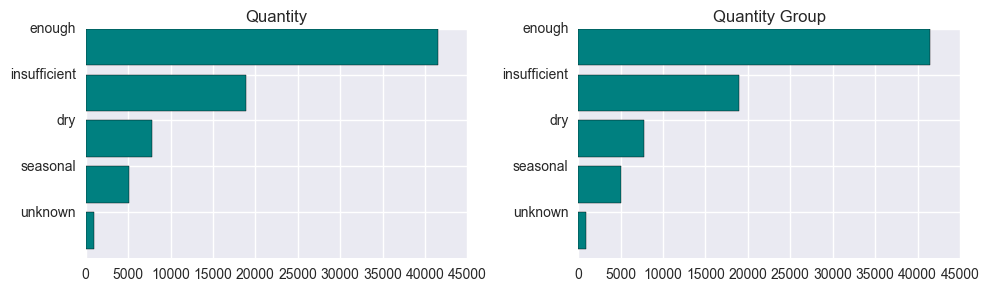

In [371]:
compare_two_columns(data = data,
                    ax1_col = 'quantity', 
                    ax1_title = 'Quantity',
                    ax2_col = 'quantity_group',
                    ax2_title = 'Quantity Group',
                    num_cols = 30,
                    figsize = (10, 3),
                    normalize = False,
                    color = ['teal'],
                    savefile = '../reports/figures/water_quantity_comparison')

I dropped the `quantity_group` column since both of these are similar

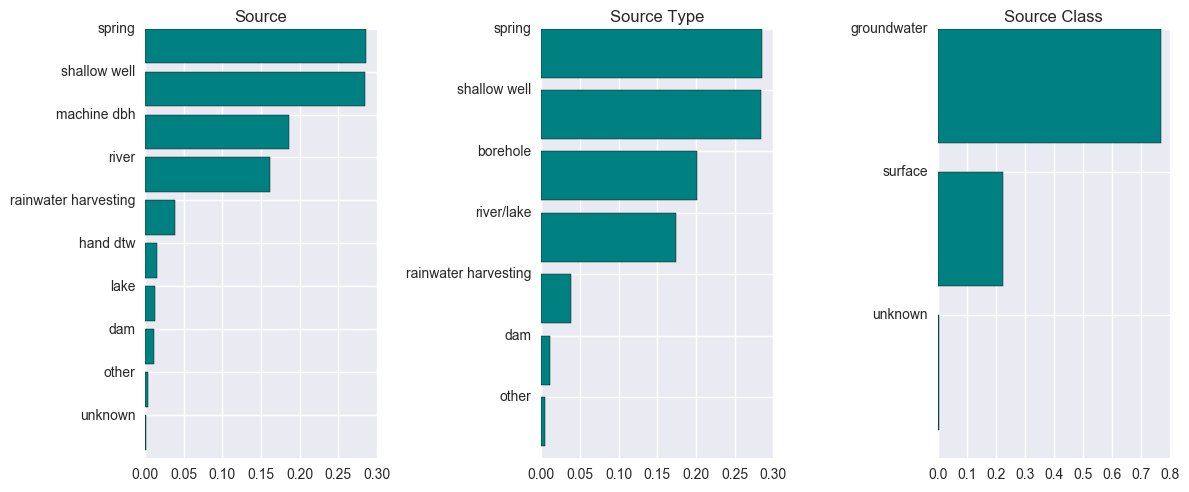

In [372]:
compare_three_columns(data = data, 
                      ax1_col = 'source', 
                      ax1_title = 'Source',
                      ax2_col = 'source_type',
                      ax2_title = 'Source Type',
                      ax3_col = 'source_class',
                      ax3_title = 'Source Class', 
                      num_cols = 30,
                      figsize = (12, 5),
                      normalize = True,
                      color = ['teal'],
                      savefile = '../reports/figures/sourceextraction_comparison') 

A closer look at the `source` and `source_type` columns show that these two columns are nearly identical.  The only difference is that `source` tells us more about the wells' water source.  For example, `source` defines whether a well gets its water from either a river or lake, while `source_type` doesn't.  In `source_type`, we see that the `river` and `lake` categories are combined.  `source` also has an `unknown` category.  This `unknown` category is bundled into `other` in the `source_type` column.  So I'll drop the `source_type` column.   

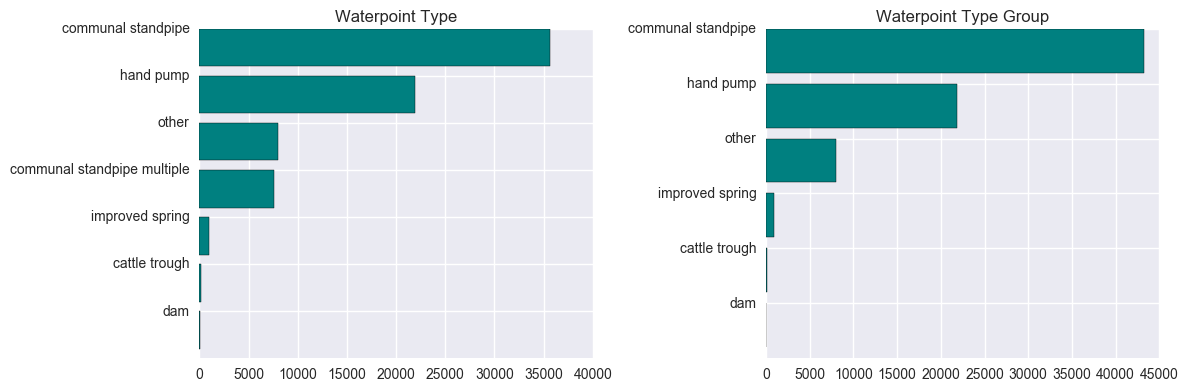

In [373]:
compare_two_columns(data = data,
                    ax1_col = 'waterpoint_type', 
                    ax1_title = 'Waterpoint Type',
                    ax2_col = 'waterpoint_type_group',
                    ax2_title = 'Waterpoint Type Group',
                    num_cols = 30,
                    figsize = (12, 4),
                    normalize = False,
                    color = ['teal'],
                    savefile = '../reports/figures/waterpoint_comparison')

The `waterpoint_type` and `water_type_group` columns are similar except that `waterpoint_type` breaks down a category, `communal standpipe` into a subgroup called `communal standpipe multiple`.  I think it's safe to drop `waterpoint_type_group`, since it doesn't disclose as much information as `waterpoint_type`.

## Missing Values

In [374]:
data.isnull().sum()

amount_tsh                   0
basin                        0
construction_year            0
date_recorded                0
district_code                0
extraction_type              0
extraction_type_class        0
extraction_type_group        0
funder                    4504
gps_height                   0
id                           0
installer                 4532
latitude                     0
lga                          0
longitude                    0
management                   0
management_group             0
num_private                  0
payment                      0
payment_type                 0
permit                    3793
population                   0
public_meeting            4155
quality_group                0
quantity                     0
quantity_group               0
recorded_by                  0
region                       0
region_code                  0
scheme_management         4846
scheme_name              35258
source                       0
source_c

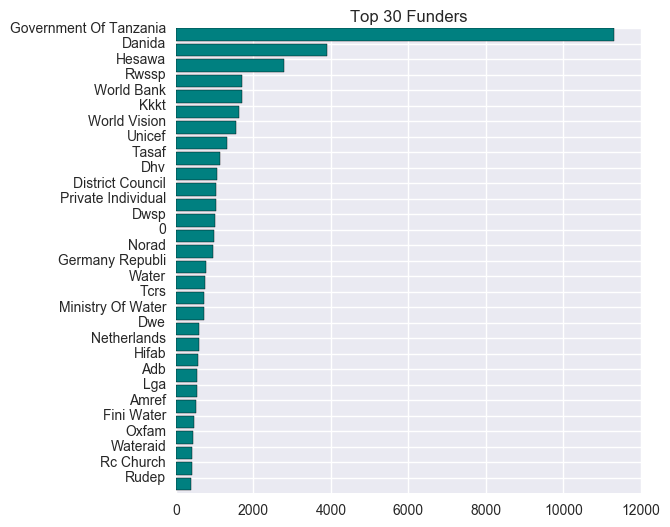

count                      69746
unique                      2140
top       Government Of Tanzania
freq                       11299
Name: funder, dtype: object

In [375]:
plot_horizontal_bar(df = data, 
                     column = 'funder', 
                     title = 'Top 30 Funders', 
                     figsize = (6, 6),
                     colors =['teal'],
                     normalize = False,
                     yticks_rotation = 0, 
                     save_path = '../reports/figures/funder')
data['funder'].describe()

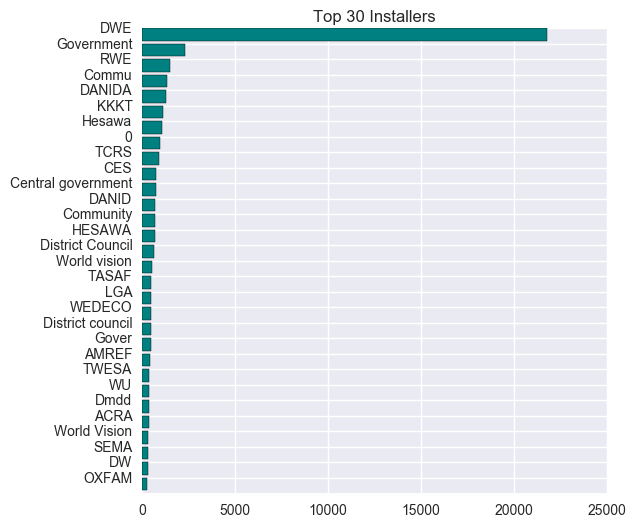

count     69718
unique     2410
top         DWE
freq      21751
Name: installer, dtype: object

In [376]:
plot_horizontal_bar(df = data, 
                     column = 'installer', 
                     title = 'Top 30 Installers', 
                     figsize = (6, 6),
                     colors =['teal'],
                     normalize = False,
                     yticks_rotation = 0, 
                     save_path = '../reports/figures/installers')
data['installer'].describe()

I replaced the missing values in the `funder` and `installer`, `scheme_management` columns with the mode

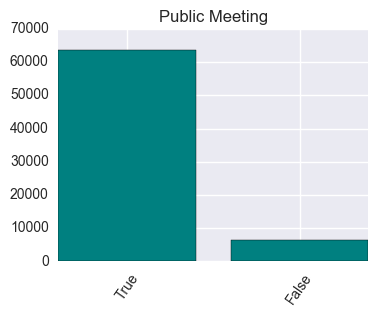

count     70095
unique        2
top        True
freq      63749
Name: public_meeting, dtype: object

In [377]:
plot_bar(df = data, 
         column = 'public_meeting', 
         title = 'Public Meeting', 
         figsize = (4, 3),
         colors =['teal'],
         normalize = False,
         xticks_rotation = 55, 
         save_path = '../reports/figures/public_meeting')
data['public_meeting'].describe()

Most values in this column are labeled as true.  I think it's safe to assign the missing values to this column.  

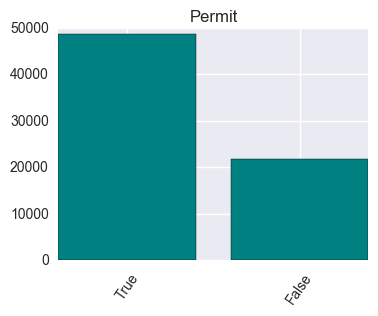

count     70457
unique        2
top        True
freq      48606
Name: permit, dtype: object

In [378]:
plot_bar(df = data, 
         column = 'permit', 
         title = 'Permit', 
         figsize = (4, 3),
         colors =['teal'],
         normalize = False,
         xticks_rotation = 55, 
         save_path = '../reports/figures/permit')
data['permit'].describe()

Since most wells are permitted, let's replace missing values in the `permit` column with `True`

## Exploring other variables

In [379]:
# amount_tsh column
print(data['amount_tsh'].describe())
print('\n')
print(data['amount_tsh'].value_counts()[:10])

count     74250.000000
mean        318.685704
std        2906.762364
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64


0.0       52049
500.0      3874
50.0       3103
1000.0     1858
20.0       1812
200.0      1516
100.0      1034
10.0        995
Name: amount_tsh, dtype: int64


There are 52049 zero values.  So I dropped this column.

In [380]:
# gps_height
print(data['gps_height'].describe())
print('\n')
print(data['gps_height'].value_counts()[:10])

count    74250.000000
mean       665.667313
std        692.761033
min        -90.000000
25%          0.000000
50%        364.000000
75%       1317.000000
max       2777.000000
Name: gps_height, dtype: float64


 0       25649
-16         71
-15         69
-13         68
-19         65
-14         64
 1290       60
-18         60
 303        59
-20         58
Name: gps_height, dtype: int64


In [381]:
# population
data['population'].describe()

count    74250.000000
mean       180.750828
std        471.086120
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64

This distribution shows that population around 36% of wells aren't populated

In [29]:
# latitude
data['latitude'].describe()

count    7.425000e+04
mean    -5.701771e+00
std      2.944969e+00
min     -1.164944e+01
25%     -8.525675e+00
50%     -5.026540e+00
75%     -3.325058e+00
max     -2.000000e-08
Name: latitude, dtype: float64

In [30]:
# longitude
data['longitude'].describe()

count    74250.000000
mean        34.074262
std          6.572519
min          0.000000
25%         33.086819
50%         34.907475
75%         37.181685
max         40.345193
Name: longitude, dtype: float64

### Categorical Variables

In [31]:
# waterpoint name - drop column 
data['wpt_name'].describe()

count     74250
unique    45684
top        none
freq       4440
Name: wpt_name, dtype: object

In [32]:
# basin - one-hot encode column
data['basin'].describe()

count             74250
unique                9
top       Lake Victoria
freq              12871
Name: basin, dtype: object

In [44]:
# recorded_by - remove column
data['recorded_by'].describe()

count                       74250
unique                          1
top       GeoData Consultants Ltd
freq                        74250
Name: recorded_by, dtype: object

## `construction_year`

A deeper look at the `construction_year` column shows that there are thousands of zeros instead of actual year values.  Leaving these zero values untouched would throw off the mean of the `construction_year` column.  The table below shows that the average construction year is 1298.  This is clearly innacurate.  

In [46]:
# construction year - group based on frequency distribution
data['construction_year'].describe()

count    74250.000000
mean      1298.463650
std        952.349375
min          0.000000
25%          0.000000
50%       1986.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64

To rectify this, I will filter the `construction_year` column for rows that contains a value greater than zero, then find the average construction year on this filtered data set.  I'll then replace the occurences of zeros in the original `construction_year` column with the average of the filtered dataframe. 

In [30]:
# get rows that contains an actual year value (value greater than zero) 
non_zero = data[data.construction_year > 0]
avg_construction_year = non_zero['construction_year'].mean()
print(round(avg_construction_year))

1997


We can see that after filtering, the average construction year is 1997--a much more realistic date than the 1298 value we calculated earlier.  

In [54]:
# Save transformed data
data.to_csv('../data/interim/transformed_data.csv', index = False)